In [16]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Load Weather Dataset

In [17]:
df = pd.read_excel('final_verified_weather_data.xlsx') 
df.head()

,Year,Month,Date,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min
0,2014,Oct,1,95,85.0,77,73,71.5,66,83,65.0,44,10,4.9,0,29.2,21.8,0.0
1,2014,Oct,2,95,85.9,77,75,72.1,70,83,65.1,44,10,3.2,0,29.2,26.3,0.0
2,2014,Oct,3,97,86.6,77,75,72.2,68,94,64.5,41,8,4.1,0,29.1,24.2,0.0
3,2014,Oct,4,95,85.5,77,77,72.5,68,89,67.5,44,7,4.3,0,29.1,15.7,0.0
4,2014,Oct,5,95,85.8,75,77,74.2,72,94,70.2,47,7,4.7,0,29.2,13.5,0.0


Create a new column for date from Year, Month and Date column

In [ ]:

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Date']].astype(str).agg('-'.join, axis=1))
df.head()

,Year,Month,Date,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min
0,2014,Oct,2014-10-01,95,85.0,77,73,71.5,66,83,65.0,44,10,4.9,0,29.2,21.8,0.0
1,2014,Oct,2014-10-02,95,85.9,77,75,72.1,70,83,65.1,44,10,3.2,0,29.2,26.3,0.0
2,2014,Oct,2014-10-03,97,86.6,77,75,72.2,68,94,64.5,41,8,4.1,0,29.1,24.2,0.0
3,2014,Oct,2014-10-04,95,85.5,77,77,72.5,68,89,67.5,44,7,4.3,0,29.1,15.7,0.0
4,2014,Oct,2014-10-05,95,85.8,75,77,74.2,72,94,70.2,47,7,4.7,0,29.2,13.5,0.0


Drop the year and month column

In [19]:
df.drop(['Year', 'Month'], axis=1, inplace=True)
df.head()

,Date,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min
0,2014-10-01,95,85.0,77,73,71.5,66,83,65.0,44,10,4.9,0,29.2,21.8,0.0
1,2014-10-02,95,85.9,77,75,72.1,70,83,65.1,44,10,3.2,0,29.2,26.3,0.0
2,2014-10-03,97,86.6,77,75,72.2,68,94,64.5,41,8,4.1,0,29.1,24.2,0.0
3,2014-10-04,95,85.5,77,77,72.5,68,89,67.5,44,7,4.3,0,29.1,15.7,0.0
4,2014-10-05,95,85.8,75,77,74.2,72,94,70.2,47,7,4.7,0,29.2,13.5,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            974 non-null    datetime64[ns]
 1   Temp_Max        974 non-null    int64         
 2   Temp_Avg        974 non-null    float64       
 3   Temp_Min        974 non-null    int64         
 4   Drew_Point_Max  974 non-null    int64         
 5   Drew_Point_Avg  974 non-null    float64       
 6   Drew_Point_Min  974 non-null    int64         
 7   Humidity_Max    974 non-null    int64         
 8   Humidity_Avg    974 non-null    float64       
 9   Humidity_Min    974 non-null    int64         
 10  Wind_Speed_Max  974 non-null    int64         
 11  Wind_Speed_Avg  974 non-null    float64       
 12  Wind_Speed_Min  974 non-null    int64         
 13  Pressure_Max    974 non-null    float64       
 14  Pressure_Avg    974 non-null    float64       
 15  Pressu

Set Date column as the index

In [21]:
df.set_index('Date', inplace=True)
df.head()

,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min
Date,,,,,,,,,,,,,,,
2014-10-01,95,85.0,77,73,71.5,66,83,65.0,44,10,4.9,0,29.2,21.8,0.0
2014-10-02,95,85.9,77,75,72.1,70,83,65.1,44,10,3.2,0,29.2,26.3,0.0
2014-10-03,97,86.6,77,75,72.2,68,94,64.5,41,8,4.1,0,29.1,24.2,0.0
2014-10-04,95,85.5,77,77,72.5,68,89,67.5,44,7,4.3,0,29.1,15.7,0.0
2014-10-05,95,85.8,75,77,74.2,72,94,70.2,47,7,4.7,0,29.2,13.5,0.0


### Read Power Data

In [22]:
solar_df = pd.read_csv('FirstWork/daily_power_production.csv')
solar_df.head()

,time,Power
0,2014-10-20,1603.387540
1,2014-10-21,2709.867432
2,2014-10-22,2605.177866
3,2014-10-23,2601.782619
4,2014-10-24,2352.663809


Set the time column as the index

In [23]:
solar_df['time'] = pd.to_datetime(solar_df['time'])
solar_df.set_index('time', inplace=True)
solar_df.head()

,Power
time,
2014-10-20,1603.387540
2014-10-21,2709.867432
2014-10-22,2605.177866
2014-10-23,2601.782619
2014-10-24,2352.663809


### Join the weather and the Solar power datasets into one dataset

In [24]:
# Join the two dataframes on their indices
combined_df = df.join(solar_df, how='inner')
combined_df.head()

,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Power
2014-10-20,90,80.1,66,63,57.9,54,83,49.1,29,9,3.8,0,29.2,23.7,0.0,1603.387540
2014-10-21,91,79.1,68,64,59.5,55,83,54.1,29,7,1.6,0,29.3,18.4,0.0,2709.867432
2014-10-22,91,78.1,66,63,60.1,55,88,56.5,31,6,1.5,0,29.3,22.6,0.0,2605.177866
2014-10-23,91,78.9,66,64,62.2,59,88,58.3,38,39,2.1,0,29.2,28.4,0.0,2601.782619
2014-10-24,86,75.5,66,64,62.9,61,88,65.4,48,12,4.3,0,29.2,23.1,0.0,2352.663809


In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 2014-10-20 to 2017-04-30
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp_Max        924 non-null    int64  
 1   Temp_Avg        924 non-null    float64
 2   Temp_Min        924 non-null    int64  
 3   Drew_Point_Max  924 non-null    int64  
 4   Drew_Point_Avg  924 non-null    float64
 5   Drew_Point_Min  924 non-null    int64  
 6   Humidity_Max    924 non-null    int64  
 7   Humidity_Avg    924 non-null    float64
 8   Humidity_Min    924 non-null    int64  
 9   Wind_Speed_Max  924 non-null    int64  
 10  Wind_Speed_Avg  924 non-null    float64
 11  Wind_Speed_Min  924 non-null    int64  
 12  Pressure_Max    924 non-null    float64
 13  Pressure_Avg    924 non-null    float64
 14  Pressure_Min    924 non-null    float64
 15  Power           924 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 122.7 KB


### Train Test Split

set the last 14 days as test dataset

In [32]:
# Define the split date
split_date = combined_df.index[-60]

# Split the data
train_data = combined_df.loc[combined_df.index < split_date]
test_data = combined_df.loc[combined_df.index >= split_date]

# Display the shapes of the resulting datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (864, 16)
Test data shape: (60, 16)


In [33]:
# now split the exogs with the 'Power' columns
train_exogs = train_data.drop('Power', axis=1)
test_exogs = test_data.drop('Power', axis=1)

train_power = train_data['Power']
test_power = test_data['Power']

In [34]:
import pmdarima as pm

# Train the autoARIMA model
model = pm.auto_arima(train_power, exogenous=train_exogs, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Print the model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=9.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13626.419, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13508.590, Time=0.82 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13372.085, Time=2.90 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13624.430, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=13371.128, Time=0.36 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=13372.048, Time=1.94 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=13373.918, Time=5.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=13336.838, Time=0.61 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=13338.354, Time=2.79 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=13338.367, Time=4.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=13340.576, Time=6.98 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=13507.175, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=13338.802, Time=0.77 sec
 ARIMA(1,1,

                 Actual    Predicted
2017-03-02  3334.069389  3191.014443
2017-03-03  2825.969896  3101.805225
2017-03-04  3441.283202  3079.440145
2017-03-05  3288.501415  3073.833136
2017-03-06  1801.088908  3072.427439
2017-03-07  2409.534353  3072.075025
2017-03-08  3558.287316  3071.986674
2017-03-09  3175.880785  3071.964524
2017-03-10  3546.422515  3071.958971
2017-03-11  3384.063656  3071.957578
2017-03-12  3285.996907  3071.957229
2017-03-13  3734.108983  3071.957142
2017-03-14  2915.935119  3071.957120
2017-03-15  2841.148637  3071.957114
2017-03-16  3654.480815  3071.957113
2017-03-17  3509.312057  3071.957113
2017-03-18  3426.642667  3071.957113
2017-03-19  3476.344303  3071.957113
2017-03-20  3693.830741  3071.957113
2017-03-21  3430.769936  3071.957113
2017-03-22  3092.805417  3071.957113
2017-03-23  2999.017239  3071.957113
2017-03-24  3518.435639  3071.957113
2017-03-25  3202.485251  3071.957113
2017-03-26  3610.732932  3071.957113
2017-03-27  3353.530707  3071.957113
2

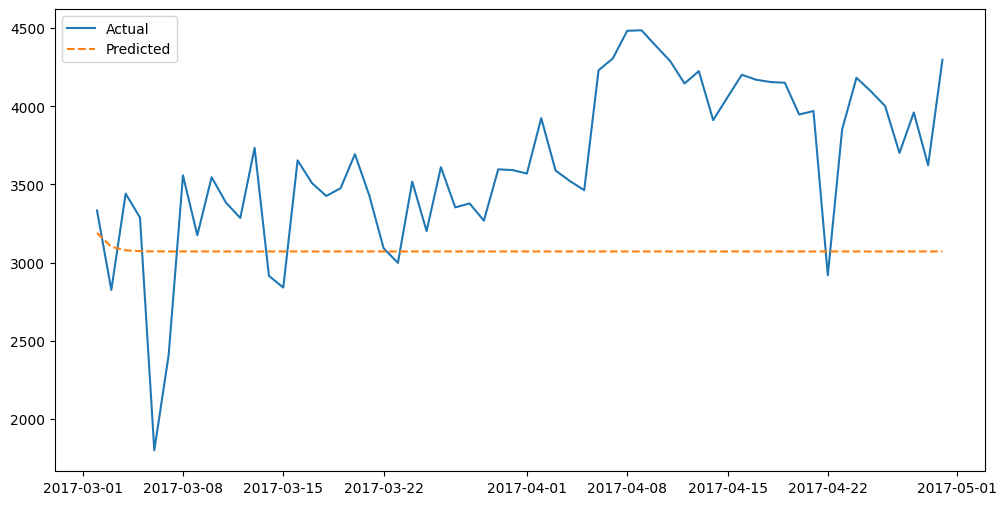

In [35]:
# Make predictions on the test data
predictions = model.predict(n_periods=len(test_power), exogenous=test_exogs)

# Create a DataFrame to compare the actual and predicted values
results = pd.DataFrame({'Actual': test_power, 'Predicted': predictions})

# Display the results
print(results)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.show()

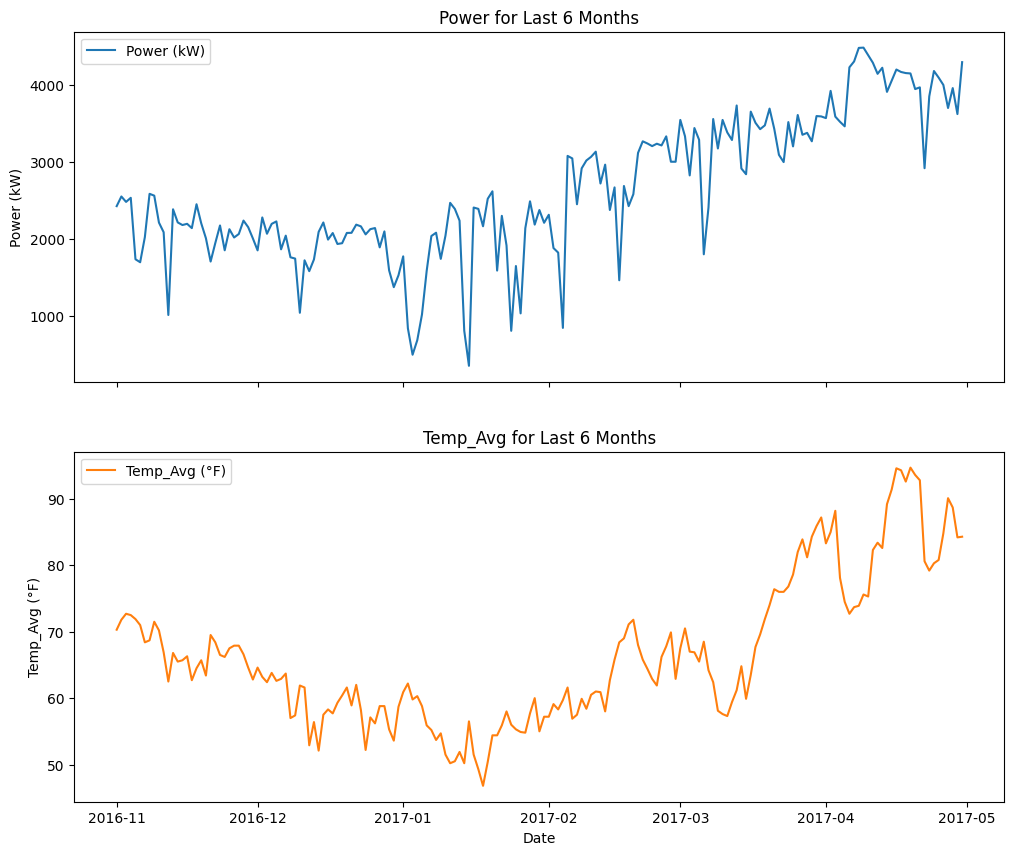

In [31]:
# Filter the data for the last 6 months
six_months_data = combined_df.loc['2016-11-01':'2017-04-30']

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot the Power on the first subplot
axs[0].plot(six_months_data.index, six_months_data['Power'], label='Power (kW)', color='tab:blue')
axs[0].set_ylabel('Power (kW)')
axs[0].set_title('Power for Last 6 Months')
axs[0].legend()

# Plot the temperature on the second subplot
axs[1].plot(six_months_data.index, six_months_data['Temp_Avg'], label=f'Temp_Avg (°F)', color='tab:orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel(f'Temp_Avg (°F)')
axs[1].set_title(f'Temp_Avg for Last 6 Months')
axs[1].legend()

# Show the plots
plt.show()

In [22]:
combined_df.describe()

,Temp_Max,Temp_Avg,Temp_Min,Drew_Point_Max,Drew_Point_Avg,Drew_Point_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_Speed_Max,Wind_Speed_Avg,Wind_Speed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Power
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,29.460678,23.380592,14.137205,62.458874,57.569156,47.514069,82.536797,60.751732,34.339827,14.003247,4.746429,0.257576,29.138095,23.272403,2.987446,3010.991263
std,8.029392,7.867743,13.238376,12.234590,11.672859,20.286059,13.731513,15.422417,19.825055,25.726729,2.712157,1.032881,1.301561,4.802695,8.830010,990.094495
min,8.888889,5.944444,-17.777778,39.000000,33.500000,0.000000,36.000000,20.700000,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,0.000000,352.399578
25%,22.777778,16.652778,7.777778,54.000000,47.900000,41.000000,78.000000,53.275000,23.000000,8.000000,2.800000,0.000000,28.900000,20.900000,0.000000,2207.360301
50%,30.000000,23.666667,16.111111,61.000000,55.150000,48.000000,87.000000,61.400000,34.000000,10.000000,4.300000,0.000000,29.200000,24.250000,0.000000,3064.301173
75%,36.111111,30.333333,25.000000,72.000000,67.025000,61.000000,93.000000,70.300000,47.000000,14.000000,6.100000,0.000000,29.300000,26.900000,0.000000,3892.832507
max,46.111111,39.388889,32.777778,205.000000,81.100000,79.000000,100.000000,96.600000,88.000000,699.000000,20.400000,6.000000,55.100000,29.400000,29.400000,5215.932167


In [36]:
combined_df.to_csv('combined_data.csv', index=False)